# CNN Classification Model to classify Species from the Orchid Flowers
## Rosie Nguyen

* Dataset: https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/0HNECY
* Problem: multi-class classification problem
* Output: Multiclass. There are 156 Orchid classes. Each image is assigned to one and only one Orchid class.
* Activation in output layer: Softmax because it's good for a multi-class classification problem which there is only one "right answer". The outputs are mutually exclusive. The softmax will enforce that the sum of the probabilities of output classes are equal to one, so in order to increase the probability of a particular class, the model must correspondingly decrease the probability of at least one of the other classes.
* Loss: sparse_categorical_crossentropy for labels (not categorical_crossentropy, it is for OneHot. With 156 classes, the onehot will be very long)
* Loss function: sparse_categorical_crossentropy
* Optimizer: Adam
* Matrics: Accuracy
* Compare with Baseline = largest class

## Importing Libraries

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers import Activation
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers import Dense
import os
import cv2
import pandas as pd
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers
from keras.layers import BatchNormalization, GlobalAveragePooling2D

## Importing Data and Preprocessing

In [ ]:
train_df = pd.read_csv(r'C:\Users\Nhung\Documents\BAN 676 Deep Learning\Assignment\Orchid Flowers Dataset-v1.1\Species_Classifier\Training_Data_for_Species.txt',header = None,dtype=str)
valid_df = pd.read_csv(r'C:\Users\Nhung\Documents\BAN 676 Deep Learning\Assignment\Orchid Flowers Dataset-v1.1\Species_Classifier\Validation_Data_for_Species.txt',header =None,dtype=str)
columns = ['Image_number', 'Species']
train_df.columns = columns
valid_df.columns = columns

In [ ]:
train_df.head()

,Image_number,Species
0,1.jpg,1
1,2.jpg,1
2,3.jpg,1
3,4.jpg,1
4,5.jpg,1


In [ ]:
train_df.shape

(5119, 2)

In [ ]:
valid_df.head()

,Image_number,Species
0,25.jpg,1
1,26.jpg,1
2,7032.jpg,1
3,7033.jpg,1
4,7034.jpg,1


In [ ]:
valid_df.shape

(1235, 2)

In [ ]:
#check species 
unique, counts = np.unique(train_df["Species"], return_counts = True)
dict(zip(unique, counts))

{'1': 24,
 '10': 12,
 '100': 107,
 '101': 3,
 '102': 2,
 '103': 20,
 '104': 21,
 '105': 9,
 '106': 98,
 '107': 46,
 '108': 37,
 '109': 9,
 '11': 179,
 '110': 92,
 '111': 28,
 '112': 10,
 '113': 14,
 '114': 21,
 '115': 16,
 '116': 20,
 '117': 74,
 '118': 37,
 '119': 26,
 '12': 122,
 '120': 12,
 '121': 3,
 '122': 3,
 '123': 10,
 '124': 4,
 '125': 121,
 '126': 12,
 '127': 17,
 '128': 85,
 '129': 64,
 '13': 29,
 '130': 31,
 '131': 8,
 '132': 9,
 '133': 82,
 '134': 10,
 '135': 45,
 '136': 4,
 '137': 18,
 '138': 3,
 '139': 32,
 '14': 2,
 '140': 4,
 '141': 61,
 '142': 10,
 '143': 14,
 '144': 10,
 '145': 80,
 '146': 7,
 '147': 5,
 '148': 8,
 '149': 12,
 '15': 16,
 '150': 11,
 '151': 36,
 '152': 4,
 '153': 4,
 '154': 5,
 '155': 12,
 '156': 37,
 '16': 3,
 '17': 24,
 '18': 9,
 '19': 176,
 '2': 11,
 '20': 42,
 '21': 20,
 '22': 78,
 '23': 101,
 '24': 46,
 '25': 6,
 '26': 21,
 '27': 239,
 '28': 49,
 '29': 29,
 '3': 77,
 '30': 31,
 '31': 25,
 '32': 45,
 '33': 268,
 '34': 15,
 '35': 104,
 '36': 5,
 '3

**In the training and test data, some species, such as 11, 19, 100, 125... has a lot more samples than other species. This is one of the reason why we use Data Augmentation later**

## Data Augmentation

The dataset is quite small. With 7156 images of orchid flowers and consists of 156 orchid species. On avarage, there are about 46 images for each specie. We want to use data augmentation to increase the amount of data by adding slightly modified copies of already existing data or newly created synthetic data from existing data. It acts as a regularizer and helps reduce overfitting when training a machine learning model.

In [ ]:
# Augment with rotated, shifted, flipped, images

train_datagen = ImageDataGenerator(
    rescale=1./255,
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
)

In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
train_generator=train_datagen.flow_from_dataframe(
dataframe=train_df,
directory="Orchid_Images",
x_col="Image_number",
y_col="Species",
subset=None,
batch_size=32,
seed=42,
shuffle=True,
class_mode="sparse",
save_format="png",
target_size=(32,32))


valid_generator=test_datagen.flow_from_dataframe(
dataframe=valid_df,
directory="Orchid_Images",
x_col="Image_number",
y_col="Species",
subset=None,
batch_size=32,
seed=42,
shuffle=True,
save_format="png",
class_mode="sparse",
target_size=(32,32))

Found 5119 validated image filenames belonging to 156 classes.
Found 1235 validated image filenames belonging to 156 classes.


## Naive model

In [ ]:
#accuracy for the training dataset
train_df = pd.read_csv(r'C:\Users\Nhung\Documents\America\CSUEB\BAN 676 Deep Learning\Assignment\Orchid Flowers Dataset-v1.1\Species_Classifier\Training_Data_for_Species.txt',sep=',', header = None, dtype=str)
train_df.columns = ["Image", "Label"]
max(train_df['Label'].value_counts())/len(train_df['Label'])

0.05235397538581754

#### Baseline performance  for the Oschid Flower Dataset is ~ 5.23%. This is very low

## a.	Building Model 1 from scratch using CNN layers

In [ ]:
#from keras.layers import BatchNormalization
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same', input_shape=(32,32,3)))
#model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(32,(3, 3)))
#model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(32, (3, 3), padding='same'))
#model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(32, (3,3)))
#model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
#model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))
# Output classes are 156
model.add(Dense(156))
model.add(Activation('softmax'))

In [ ]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_24 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
activation_25 (Activation)   (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_32 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_18 (Dropout)         (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 15, 15, 32)      

In [ ]:
optimizer = keras.optimizers.RMSprop(learning_rate=0.0003, decay=1e-6)
model.compile(optimizer,loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [ ]:
STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size
STEP_SIZE_VALID=valid_generator.n//valid_generator.batch_size

In [ ]:
history= model.fit_generator(generator=train_generator,
                    steps_per_epoch=STEP_SIZE_TRAIN,
                    validation_data=valid_generator,
                    validation_steps=STEP_SIZE_VALID,
                    epochs=50
)

C:\anaconda3\envs\tensorflow\lib\site-packages\keras_preprocessing\image\image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
C:\anaconda3\envs\tensorflow\lib\site-packages\keras_preprocessing\image\image_data_generator.py:728: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/50
159/159 [==============================] - 42s 266ms/step - loss: 4.6053 - accuracy: 0.0515 - val_loss: 4.3478 - val_accuracy: 0.0913
Epoch 2/50
159/159 [==============================] - 61s 381ms/step - loss: 4.3344 - accuracy: 0.0812 - val_loss: 4.1924 - val_accuracy: 0.1069
Epoch 3/50
159/159 [==============================] - 84s 525ms/step - loss: 4.2028 - accuracy: 0.0965 - val_loss: 4.1093 - val_accuracy: 0.1225
Epoch 4/50
159/159 [==============================] - 73s 461ms/step - loss: 4.0858 - accuracy: 0.1156 - val_loss: 3.9520 - val_accuracy: 0.1587
Epoch 5/50
159/159 [==============================] - 60s 377ms/step - loss: 3.9851 - accuracy: 0.1290 - val_loss: 3.8826 - val_accuracy: 0.1620
Epoch 6/50
159/159 [==============================] - 53s 332ms/step - loss: 3.8952 - accuracy: 0.1297 - val_loss: 3.8386 - val_accuracy: 0.1595
Epoch 7/50
159/159 [==============================] - 49s 309ms/step - loss: 3.8167 - accuracy: 0.1417 - val_loss: 3.7097 - val_ac

In [ ]:
print("Accuracy of the Basic Model = ",max(history.history["accuracy"]))
print("Loss of the Basic Model = ",max(history.history["loss"]))

Accuracy of the Basic Model =  0.3074503540992737
Loss of the Basic Model =  4.605329990386963


### Plot results of accuracy

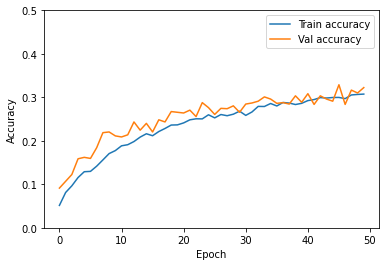

In [ ]:
def plot_history1(history):
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.plot(history.epoch, np.array(history.history['accuracy']),
           label='Train accuracy')
  plt.plot(history.epoch, np.array(history.history['val_accuracy']),
           label = 'Val accuracy')
  plt.legend()
  plt.ylim([0, 0.5])

plot_history1(history)

**From the plot results of accuracy, train accuracy is higher than val accuracy => this is overfitting.**

### Plot results of loss

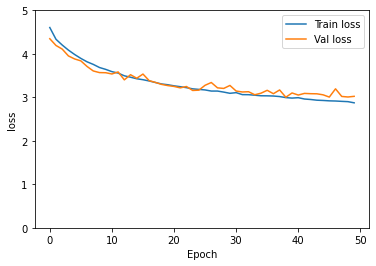

In [ ]:
def plot_history2(history):
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('loss')
  plt.plot(history.epoch, np.array(history.history['loss']),
           label='Train loss')
  plt.plot(history.epoch, np.array(history.history['val_loss']),
           label = 'Val loss')
  plt.legend()
  plt.ylim([0, 5])

plot_history2(history)

**From the plot results for loss, val loss is higher than train loss => the model is overfitting**

### Compare the Basic model with Naive model:

**The highest accuracy for basic model is 36% at epoch 42. The badic model is overfitting**
**To imporve the basic model, we can do the following:**
- Early stopping: Stop training when a monitored metric has stopped improving.
- Node, layers: try different number of neurons in the hidden layer and numbers of hidden layers
- Change % Dropout: Probabilistically remove inputs during training.

**The basic model has higher accuracy than Naive model ( 36% > 5.23%) so we can tell that basic model is better than Naive model**

## b.	Model 2: Use Transfer learning


In [ ]:
base_model = tf.keras.applications.ResNet50V2(input_shape=(32,32,3),
                                              include_top=False,
                                              weights='imagenet')
base_model.trainable = False
model_tl = Sequential()
model_tl.add(base_model)
model_tl.add(GlobalAveragePooling2D())
model_tl.add(Dense(512))
model_tl.add(Activation('relu'))
model_tl.add(Dropout(0.5))
model_tl.add(Dense(156))
model_tl.add(Activation('softmax'))

In [ ]:
optimizer = tf.keras.optimizers.Adam()
model_tl.compile(optimizer, 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size
STEP_SIZE_VALID=valid_generator.n//valid_generator.batch_size

In [ ]:
history_tl= model_tl.fit_generator(generator=train_generator,
                    steps_per_epoch=STEP_SIZE_TRAIN,
                    validation_data=valid_generator,
                    validation_steps=STEP_SIZE_VALID,
                    epochs=50
)

C:\anaconda3\envs\tensorflow\lib\site-packages\keras_preprocessing\image\image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
C:\anaconda3\envs\tensorflow\lib\site-packages\keras_preprocessing\image\image_data_generator.py:728: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/50
159/159 [==============================] - 89s 562ms/step - loss: 4.5737 - accuracy: 0.0588 - val_loss: 4.3490 - val_accuracy: 0.0748
Epoch 2/50
159/159 [==============================] - 81s 509ms/step - loss: 4.2871 - accuracy: 0.0786 - val_loss: 4.2744 - val_accuracy: 0.0979
Epoch 3/50
159/159 [==============================] - 83s 521ms/step - loss: 4.1980 - accuracy: 0.0914 - val_loss: 4.2278 - val_accuracy: 0.0880
Epoch 4/50
159/159 [==============================] - 84s 530ms/step - loss: 4.1243 - accuracy: 0.1016 - val_loss: 4.1779 - val_accuracy: 0.0970
Epoch 5/50
159/159 [==============================] - 82s 516ms/step - loss: 4.0783 - accuracy: 0.1028 - val_loss: 4.1598 - val_accuracy: 0.1094
Epoch 6/50
159/159 [==============================] - 84s 526ms/step - loss: 4.0411 - accuracy: 0.1095 - val_loss: 4.1308 - val_accuracy: 0.1176
Epoch 7/50
159/159 [==============================] - 84s 528ms/step - loss: 4.0368 - accuracy: 0.1050 - val_loss: 4.0968 - val_ac

In [ ]:
print("Accuracy of the Basic Model = ",max(history_tl.history["accuracy"]))
print("Loss of the Basic Model = ",max(history_tl.history["loss"]))

Accuracy of the Basic Model =  0.15765677392482758
Loss of the Basic Model =  4.573671817779541


### Plot results of accuracy for Transfer Learning Model

Transfer Learning Model


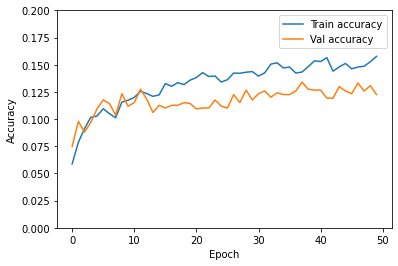

In [ ]:
def plot_history1(history):
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.plot(history.epoch, np.array(history.history['accuracy']),
           label='Train accuracy')
  plt.plot(history.epoch, np.array(history.history['val_accuracy']),
           label = 'Val accuracy')
  plt.legend()
  plt.ylim([0, 0.2])

plot_history1(history_tl)
print('Transfer Learning Model')

**From the plot results of accuracy, val accuracy is higher than train accuracy from epoch 0 to 12 => the model is underfitting
From epoch 12 to 50, training accuracy is higher than val accuracy => The model is overfitting**

### Plot results of loss for Transfer Learning Model

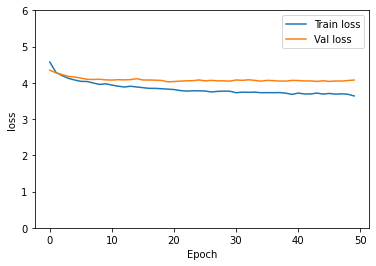

In [ ]:
def plot_history2(history):
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('loss')
  plt.plot(history.epoch, np.array(history.history['loss']),
           label='Train loss')
  plt.plot(history.epoch, np.array(history.history['val_loss']),
           label = 'Val loss')
  plt.legend()
  plt.ylim([0, 6])

plot_history2(history_tl)

**From the plot results for loss, val loss is higher than train loss => There is no generalization error and the model is overfitting**


## Compare the Transfer Learning Model with Basic Model and Naive Model

### Both Basic model and Transfer Learning Model are better than the Naive Model but they are overfitting. However, the highest accuracy for basic model is 36% at epoch 42 and The highest accuracy for the transfer learning model is 16% at epoch 50 => The basic model is best 